In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

## Step 1: Load the Dataset
We'll load the Breast Cancer dataset, which is conveniently included in Scikit-learn. The goal is to predict whether a tumor is malignant (1) or benign (0).

In [2]:
# Load the dataset
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

print("Dataset Description:")
print(cancer.DESCR.split('\n')[2]) # Print a brief description
print("\nFirst 5 rows of the dataset:")
print(df.head())

Dataset Description:
Breast cancer Wisconsin (diagnostic) dataset

First 5 rows of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809 

## Step 2: Train/Test Split and Standardize Features
Before training, we must split our data into training and testing sets. We also need to standardize the features, which means scaling them to have a mean of 0 and a standard deviation of 1. This is important for logistic regression to perform well. 

In [3]:
# Define features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 3: Fit a Logistic Regression Model
Now, we'll create an instance of the 

LogisticRegression model and fit it to our scaled training data.

In [4]:
# Create and fit the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

print("Logistic Regression model fitted successfully.")

Logistic Regression model fitted successfully.


## Step 4: Evaluate the Model
We'll evaluate our model's performance on the unseen test data using several key classification metrics.

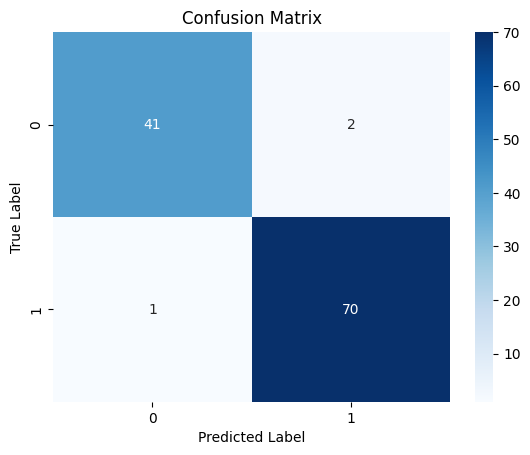


--- Classification Report ---
               precision    recall  f1-score   support

Malignant (0)       0.98      0.95      0.96        43
   Benign (1)       0.97      0.99      0.98        71

     accuracy                           0.97       114
    macro avg       0.97      0.97      0.97       114
 weighted avg       0.97      0.97      0.97       114



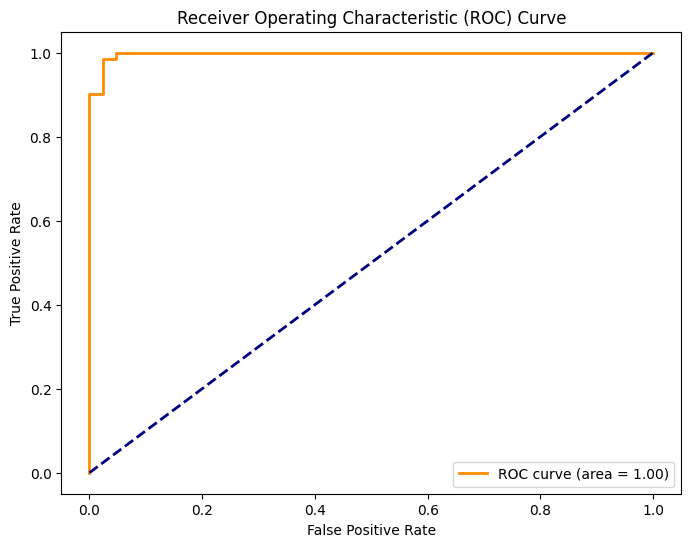

In [5]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 2. Precision, Recall, and F1-Score
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Malignant (0)', 'Benign (1)']))

# 3. ROC-AUC Curve
y_pred_proba = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Step 5: Tune Threshold and Explain Sigmoid Function
The Sigmoid Function
Logistic regression is named after the sigmoid function. This function takes any real-valued number and squishes it into a range between 0 and 1, which we interpret as a probability.

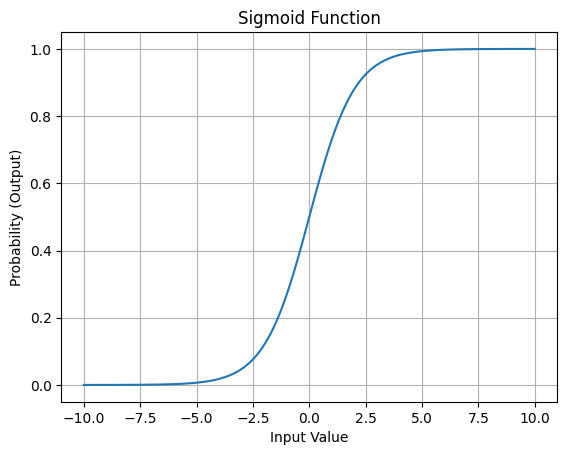

In [6]:
# Plotting the Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid Function')
plt.xlabel('Input Value')
plt.ylabel('Probability (Output)')
plt.grid(True)
plt.show()

Explanation: As you can see, the S-shaped curve takes any input and outputs a probability between 0 and 1.

Tuning the Threshold
By default, logistic regression uses a probability threshold of 0.5. If the predicted probability is > 0.5, it classifies the instance as 1 (Benign); otherwise, it's 0 (Malignant). We can change this threshold to optimize for either precision or recall.


--- Confusion Matrix with new threshold of 0.3 ---


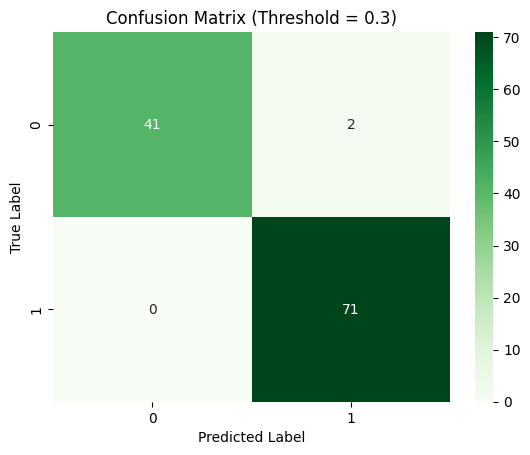

In [7]:
# Get the predicted probabilities for the test set
y_pred_proba = model.predict_proba(X_test_scaled)[:,1]

# Apply a new threshold of 0.3
new_threshold = 0.3
y_pred_new_threshold = (y_pred_proba >= new_threshold).astype(int)

# See how the confusion matrix changes
print(f"\n--- Confusion Matrix with new threshold of {new_threshold} ---")
conf_matrix_new = confusion_matrix(y_test, y_pred_new_threshold)
sns.heatmap(conf_matrix_new, annot=True, fmt='g', cmap='Greens')
plt.title(f'Confusion Matrix (Threshold = {new_threshold})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Explanation: Lowering the threshold might catch more true positives (increasing recall) at the cost of having more false positives (decreasing precision). The best threshold depends on the specific problem you are trying to solve